<a href="https://colab.research.google.com/github/siriwat-heart/Multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional Scaling

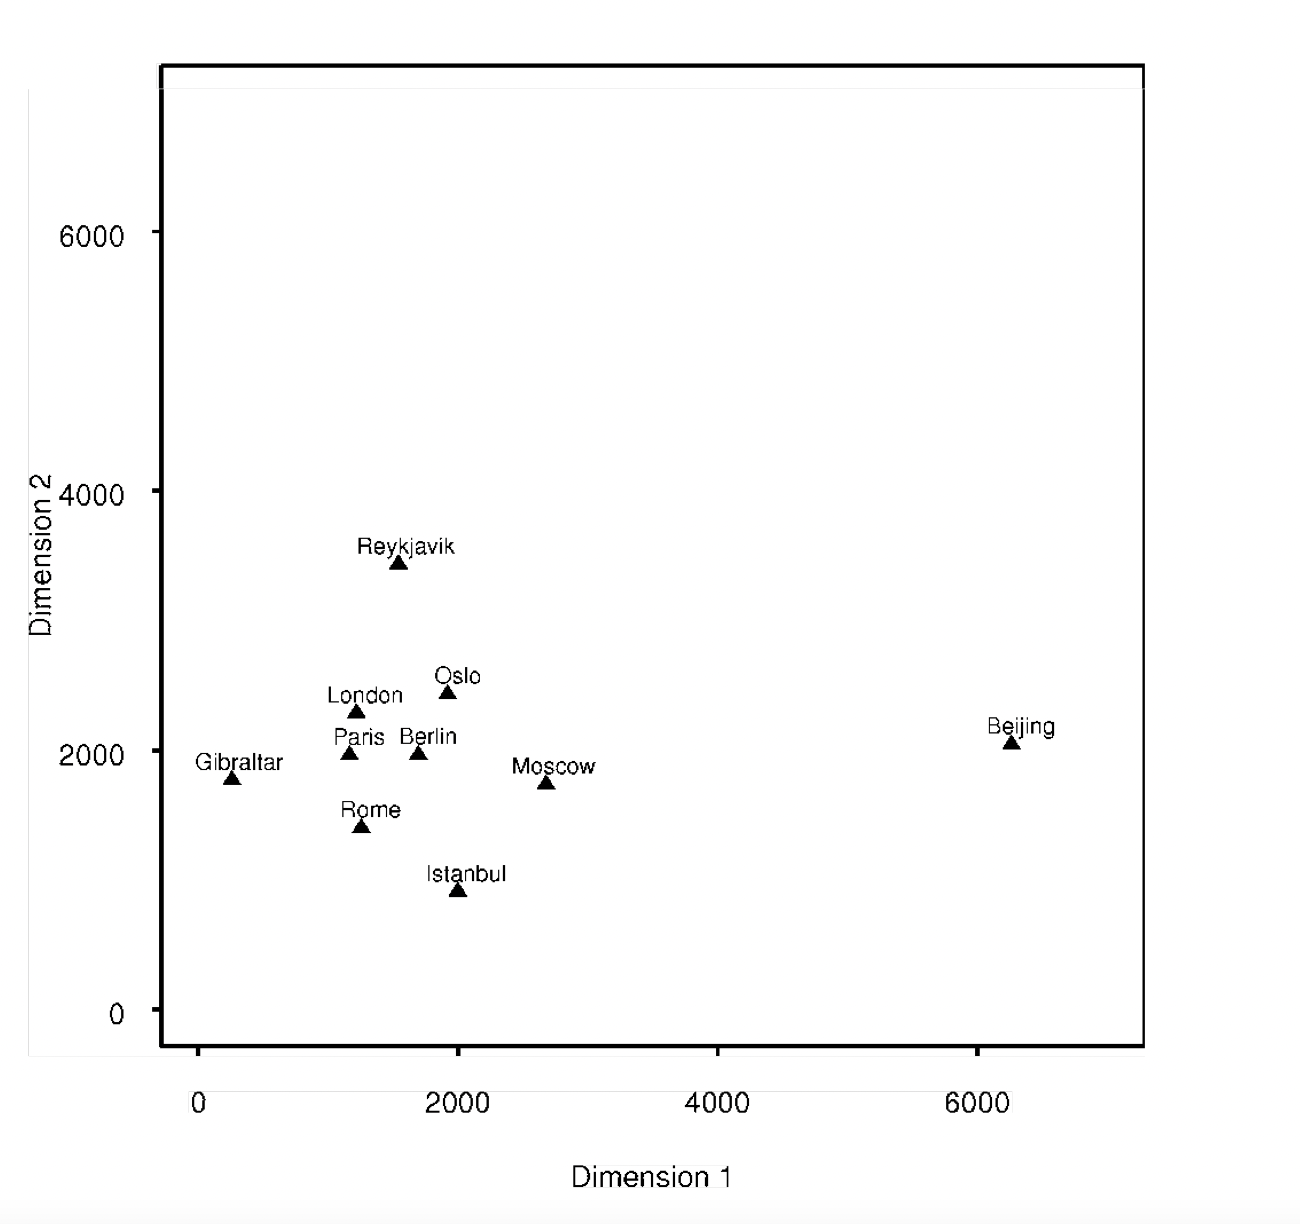

## Example on Iris dataset

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)

In [5]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [6]:
from matplotlib import pyplot as plt

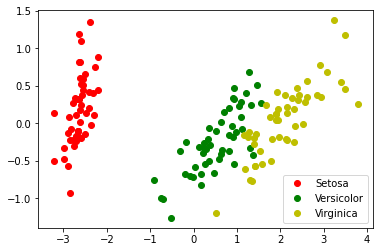

In [7]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label='Virginica')
plt.legend()

##Quiz 4

In [8]:
from sklearn.decomposition import  PCA

In [9]:
pca = PCA(n_components=2)

In [10]:
X_pca = pca.fit_transform(X)

NameError: ignored

In [12]:
from matplotlib import pyplot as plt

In [13]:
plt.plot(X_pca[:,0],X_pca[:,1])
plt.legend()

NameError: ignored